In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

Información del conjunto de datos - Nivel de obesidad

integrantes: Jhonier Gallego / Ivan cepeda

https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data

Este conjunto de datos se centra en la estimación de los niveles de obesidad de individuos en México, Perú y Colombia, utilizando información sobre hábitos alimentarios y condición física. Se compone de 2111 registros y 17 atributos que describen diversas características relacionadas con la salud, como la ingesta de alimentos, la actividad física, el tiempo dedicado a actividades sedentarias, entre otros.

Los datos están etiquetados con una variable de clase llamada "NObesity" que clasifica a los individuos en diferentes categorías de peso: Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III. Esta clasificación permite realizar análisis detallados sobre las tendencias de obesidad y sobrepeso en los países mencionados.

El 77% de los datos fueron generados sintéticamente utilizando la herramienta Weka y el filtro SMOTE (Synthetic Minority Over-sampling Technique), mientras que el 23% de los datos fueron recolectados directamente de usuarios mediante una plataforma web, garantizando una combinación de datos reales y generados para una mejor representatividad de la población estudiada.

- Genero: Categórico, "Género"
- Edad: Continua, "Edad"
- Altura: Continua, "Altura"
- Peso: Continua, "Peso"
- Historico_familiar_con_sobrepeso: Binario, "¿Algún miembro de su familia ha sufrido o sufre de sobrepeso?"
- FAVC: Binario, "¿Consume alimentos altos en calorías frecuentemente?"
- FCVC: Entero, "¿Suele comer verduras en sus comidas?"
- NCP: Continua, "¿Cuántas comidas principales tiene al día?"
- CAEC: Categórico, "¿Consume algún alimento entre comidas?"
- FUMA: Binario, "¿Fuma?"
- CH2O: Continua, "¿Cuánta agua bebe diariamente?"
- SCC: Binario, "¿Monitorea las calorías que consume diariamente?"
- FAF: Continua, "¿Con qué frecuencia realiza actividad física?"
- TUE: Entero, "¿Cuánto tiempo usa dispositivos tecnológicos como teléfono celular, videojuegos, televisión, computadora y otros?"
- CALC: Categórico, "¿Con qué frecuencia consume alcohol?"
- MTRANS: Categórico, "¿Qué medio de transporte utiliza normalmente?"
- NObeyesdad: Categórico, "Nivel de obesidad"

Problemática

La obesidad es un problema de salud que afecta a personas de todo el mundo, causando problemas físicos y emocionales, y aumentando el riesgo de enfermedades graves como la diabetes, problemas del corazón, y otras condiciones crónicas. A medida que el número de personas con obesidad sigue creciendo, es crucial entender qué factores, como los hábitos alimentarios, la actividad física y otros aspectos del estilo de vida, influyen en su desarrollo. Con esta información, se pueden mejorar las estrategias de prevención y tratamiento para abordar este problema de manera más efectiva.

Valor Generado

Este conjunto de datos proporciona información útil para investigadores, médicos, y responsables de políticas públicas que buscan enfrentar la obesidad de manera más efectiva. Al analizar los datos, se pueden identificar patrones y factores que contribuyen al aumento de peso en las personas. Esto puede ayudar a diseñar programas de prevención, campañas de concientización y políticas de salud más eficaces, con el objetivo de prevenir y tratar la obesidad. Además, este análisis puede ser la base para desarrollar herramientas de predicción que permitan una intervención temprana y más personalizada en personas con riesgo de desarrollar obesidad.

In [3]:
df= pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [4]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.rename(columns={
    'Gender': 'Genero',
    'Age': 'Edad',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history_with_overweight': 'Historico_familiar_con_sobrepeso',
    'FAVC': 'FAVC',
    'FCVC': 'FCVC',
    'NCP': 'NCP',
    'CAEC': 'CAEC',
    'SMOKE': 'FUMA',
    'CH2O': 'CH2O',
    'SCC': 'SCC',
    'FAF': 'FAF',
    'TUE': 'TUE',
    'CALC': 'CALC',
    'MTRANS': 'MTRANS',
    'NObeyesdad': 'Nivel_de_obesidad'
}, inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Edad                              2111 non-null   float64
 1   Genero                            2111 non-null   object 
 2   Altura                            2111 non-null   float64
 3   Peso                              2111 non-null   float64
 4   CALC                              2111 non-null   object 
 5   FAVC                              2111 non-null   object 
 6   FCVC                              2111 non-null   float64
 7   NCP                               2111 non-null   float64
 8   SCC                               2111 non-null   object 
 9   FUMA                              2111 non-null   object 
 10  CH2O                              2111 non-null   float64
 11  Historico_familiar_con_sobrepeso  2111 non-null   object 
 12  FAF   

In [7]:
df1 = df.copy()

In [8]:
df1.head()

,Edad,Genero,Altura,Peso,CALC,FAVC,FCVC,NCP,SCC,FUMA,CH2O,Historico_familiar_con_sobrepeso,FAF,TUE,CAEC,MTRANS,Nivel_de_obesidad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
# Contar los valores nulos en cada columna
conteo_faltantes = df1.isnull().sum()

# Mostrar todas las columnas y la cantidad de valores nulos en cada una
print("Cantidad de valores nulos en cada columna:")
print(conteo_faltantes)

Cantidad de valores nulos en cada columna:
Edad                                0
Genero                              0
Altura                              0
Peso                                0
CALC                                0
FAVC                                0
FCVC                                0
NCP                                 0
SCC                                 0
FUMA                                0
CH2O                                0
Historico_familiar_con_sobrepeso    0
FAF                                 0
TUE                                 0
CAEC                                0
MTRANS                              0
Nivel_de_obesidad                   0
dtype: int64


In [10]:
np.random.seed(42)

# Obtener los nombres de las columnas del DataFrame
columnas = df1.columns

# Iterar sobre cada columna para añadir entre 0 y 10 valores vacíos aleatorios
for columna in columnas:
    # Obtener el número de valores vacíos a añadir (entre 0 y 10)
    num_vacios = np.random.randint(0, 11)  # entre 0 y 10 (11 no incluido)
    
    # Si el número de vacíos es mayor que 0, proceder
    if num_vacios > 0:
        # Seleccionar índices aleatorios en el DataFrame
        indices_vacios = np.random.choice(df1.index, size=num_vacios, replace=False)
        
        # Reemplazar los valores en esos índices por np.nan
        for idx in indices_vacios:
            df1.loc[idx, columna] = np.nan  # Usar np.nan para los valores vacíos   




Con la funcion anterior se crearon datos nulos para cada columna, se añadian entre 0 y 10 datos nulos ya que inicialmente el dataset no tenia ningun dato nulo y al no tenerlo se debian generar datos nulos de manera aleatoria

In [11]:
df1.head()

,Edad,Genero,Altura,Peso,CALC,FAVC,FCVC,NCP,SCC,FUMA,CH2O,Historico_familiar_con_sobrepeso,FAF,TUE,CAEC,MTRANS,Nivel_de_obesidad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,NaN,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [12]:
# Contar los valores nulos en cada columna
conteo_faltantes = df1.isnull().sum()

# Mostrar todas las columnas y la cantidad de valores nulos en cada una
print("Cantidad de valores nulos en cada columna:")
print(conteo_faltantes)

Cantidad de valores nulos en cada columna:
Edad                                 6
Genero                              10
Altura                               6
Peso                                10
CALC                                 0
FAVC                                10
FCVC                                 0
NCP                                 10
SCC                                  7
FUMA                                 5
CH2O                                 9
Historico_familiar_con_sobrepeso     1
FAF                                  7
TUE                                  6
CAEC                                 0
MTRANS                              10
Nivel_de_obesidad                    9
dtype: int64


se verifica que se hayan generado los valores nulos solicitados anteriormente, se comrpueba que de las 17 columnas, solamente 3 quedaton sin valores nulos

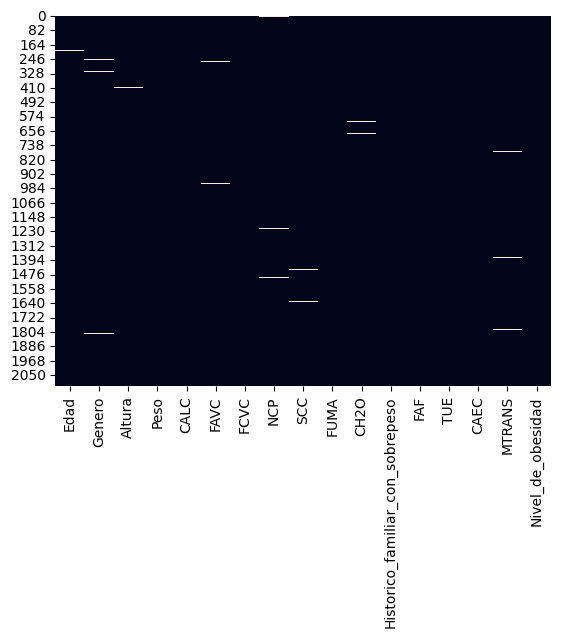

In [13]:
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

In [14]:

# Rellenar datos nulos en columnas categóricas con la moda
df1['Genero'] = df1['Genero'].fillna(df1['Genero'].mode()[0])
df1['FAVC'] = df1['FAVC'].fillna(df1['FAVC'].mode()[0])
df1['SCC'] = df1['SCC'].fillna(df1['SCC'].mode()[0])
df1['FUMA'] = df1['FUMA'].fillna(df1['FUMA'].mode()[0])
df1['Historico_familiar_con_sobrepeso'] = df1['Historico_familiar_con_sobrepeso'].fillna(df1['Historico_familiar_con_sobrepeso'].mode()[0])
df1['MTRANS'] = df1['MTRANS'].fillna(df1['MTRANS'].mode()[0])
df1['Nivel_de_obesidad'] = df1['Nivel_de_obesidad'].fillna(df1['Nivel_de_obesidad'].mode()[0])

# Rellenar datos nulos en columnas numéricas con la media sin decimales
df1['Edad'] = df1['Edad'].fillna(df1['Edad'].mean().astype(int)).astype(int)
df1['Altura'] = df1['Altura'].fillna(df1['Altura'].mean().astype(int)).astype(int)
df1['Peso'] = df1['Peso'].fillna(df1['Peso'].mean().astype(int)).astype(int)
df1['NCP'] = df1['NCP'].fillna(df1['NCP'].mean().astype(int)).astype(int)
df1['CH2O'] = df1['CH2O'].fillna(df1['CH2O'].mean().astype(int)).astype(int)
df1['FAF'] = df1['FAF'].fillna(df1['FAF'].mean().astype(int)).astype(int)
df1['TUE'] = df1['TUE'].fillna(df1['TUE'].mean().astype(int)).astype(int)



con la funcion anterior se llenan todos los datos nulos que tenia el dataset, en el caso de las variables categóricas se usó la moda para rellenar los datos nulos y para las variables numéricas se utilizó la media sin decimales

In [15]:
# Contar los valores nulos en cada columna
conteo_faltantes = df1.isnull().sum()

# Mostrar todas las columnas y la cantidad de valores nulos en cada una
print("Cantidad de valores nulos en cada columna:")
print(conteo_faltantes)

Cantidad de valores nulos en cada columna:
Edad                                0
Genero                              0
Altura                              0
Peso                                0
CALC                                0
FAVC                                0
FCVC                                0
NCP                                 0
SCC                                 0
FUMA                                0
CH2O                                0
Historico_familiar_con_sobrepeso    0
FAF                                 0
TUE                                 0
CAEC                                0
MTRANS                              0
Nivel_de_obesidad                   0
dtype: int64


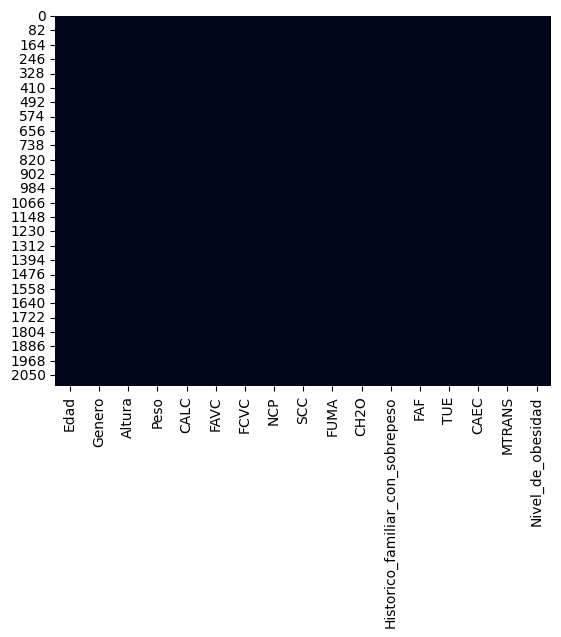

In [16]:
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

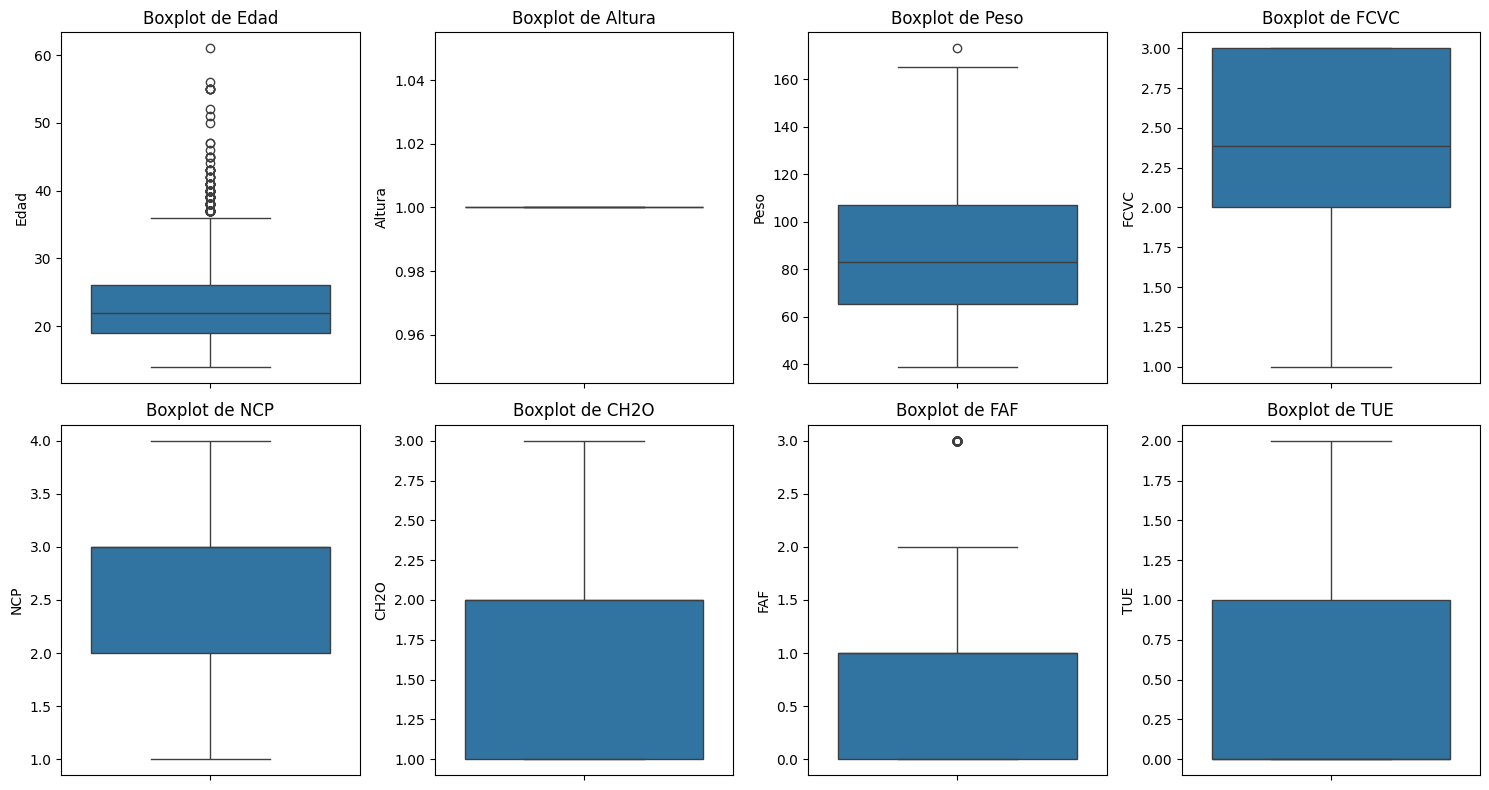

In [17]:
Variables_numericas = ['Edad', 'Altura', 'Peso', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Crear una figura con subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Crear gráficos de cajas
for ax, col in zip(axes.flat, Variables_numericas):
    sns.boxplot(data=df1[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')

# Ajustar el layout para evitar superposición
plt.tight_layout()
plt.show()

se graficaron boxplots para ver el comportamiento de cada variable, en que rangos estaban registrados los datos, conocer la media, la mediana, los limites superior e inferior y ver si habian datos atipicos.

fue posible observar que, en el caso de la edad habian valores atipicos, pero se toma le desicion de no eliminarlos porque la información puede ser util para ver cuales son los hábitos y condiciones de los adultos mayores

In [18]:
df2 = df1.copy()

## Gráfico de barras para la columna 'Nivel_de_obesidad'

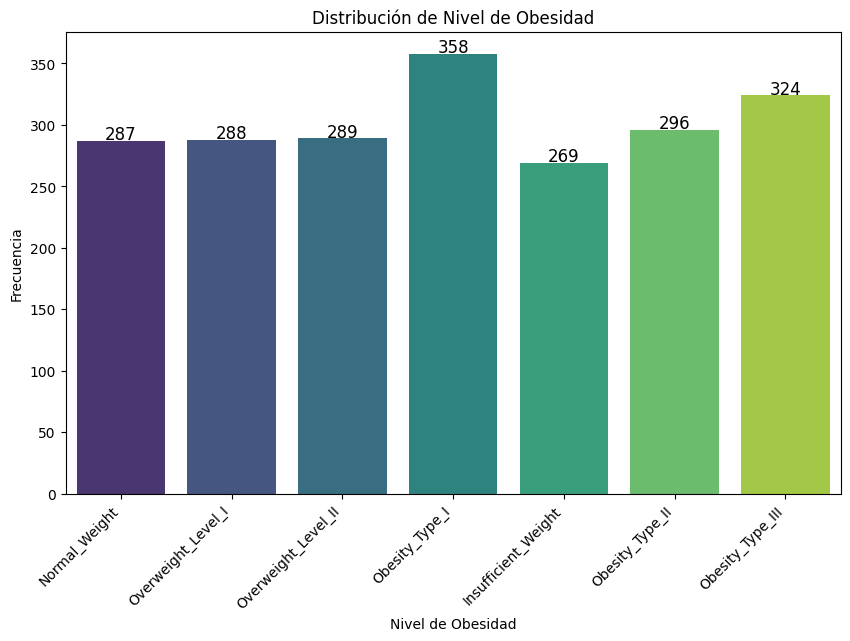

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Nivel_de_obesidad', hue='Nivel_de_obesidad', palette='viridis', legend=False)

# Ajustar la rotación de las etiquetas del eje x
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas 45 grados a la derecha

# Añadir títulos y etiquetas
plt.title('Distribución de Nivel de Obesidad')
plt.xlabel('Nivel de Obesidad')
plt.ylabel('Frecuencia')

for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height() + 1,
                   int(p.get_height()), ha='center', fontsize=12)

# Mostrar el gráfico
plt.show()

En la distribucion de nivel de obesidad se logra observar que el nivel de obesidad tipo 1 es la categoría que muestra mayor frecuencia entre las personas a las que se le realizó el estudio

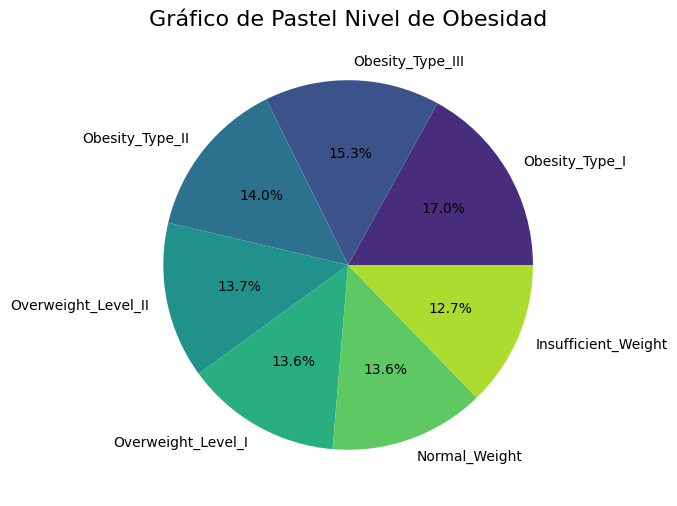

In [21]:
# Crear la serie con valores aleatorios

# Seleccionar la paleta de colores pasteles
colors = sns.color_palette('viridis', len(df2['Nivel_de_obesidad'].unique()))

# Generar el gráfico de pastel
df2['Nivel_de_obesidad'].value_counts().plot.pie(figsize=(6, 6), colors=colors, autopct='%1.1f%%')

# Añadir título
plt.title('Gráfico de Pastel Nivel de Obesidad', fontsize=16)

# Mostrar el gráfico
plt.ylabel('')  # Elimina la etiqueta de y
plt.show()

alrededor del 46% de las personas encuestadas se encontraban dentro de unos de los niveles de obesidad, solamente el 13,6% está en un peso normal

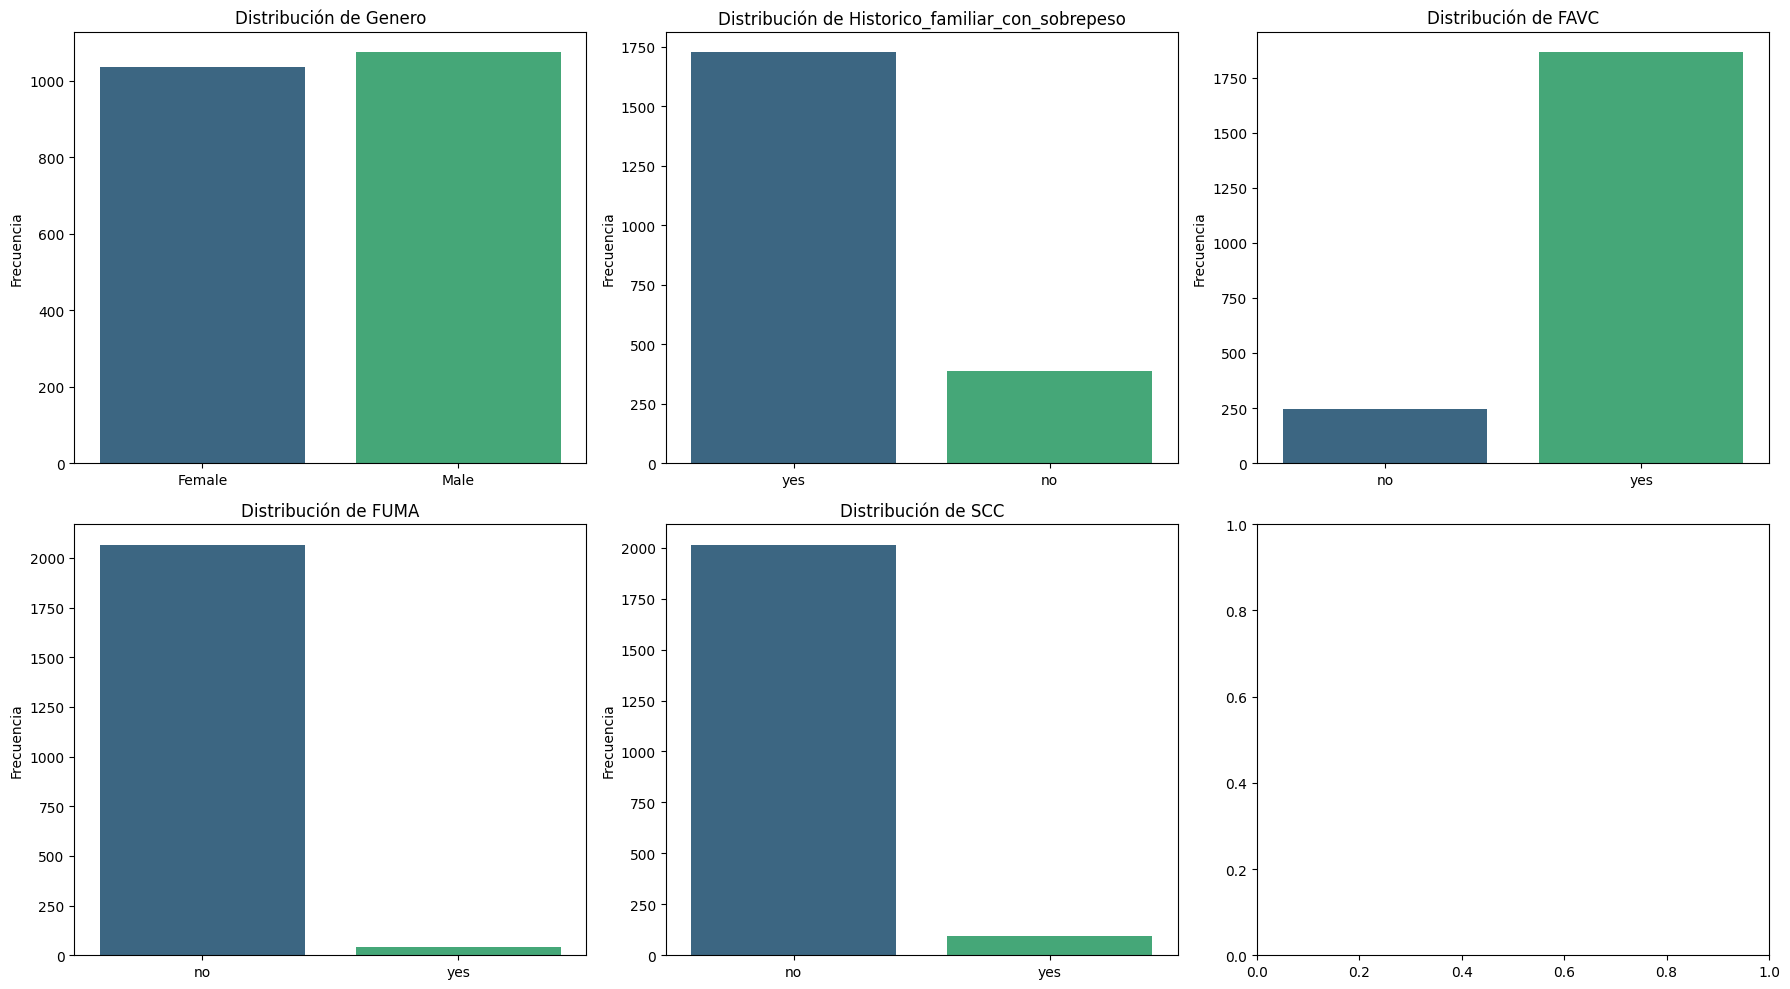

In [22]:
# Lista de variables binarias
variables_binarias = [
    'Genero', 
    'Historico_familiar_con_sobrepeso', 
    'FAVC', 
    'FUMA', 
    'SCC'
]

# Crear subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Crear gráficos de barras para cada variable binaria
for ax, col in zip(axes.flat, variables_binarias):
    sns.countplot(data=df2, x=col, palette='viridis', ax=ax, hue=col)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')
    


# Ajustar el layout para evitar superposición
plt.tight_layout()
plt.show()

In [23]:
df2.groupby(['Genero']).size()

Genero
Female    1037
Male      1074
dtype: int64

In [24]:
df2.groupby(['Nivel_de_obesidad']).size()

Nivel_de_obesidad
Insufficient_Weight    269
Normal_Weight          287
Obesity_Type_I         358
Obesity_Type_II        296
Obesity_Type_III       324
Overweight_Level_I     288
Overweight_Level_II    289
dtype: int64

In [25]:
df_grouped = df2.groupby(['Genero','Nivel_de_obesidad']).size().reset_index(name='Count')
print(df_grouped)

    Genero    Nivel_de_obesidad  Count
0   Female  Insufficient_Weight    171
1   Female        Normal_Weight    140
2   Female       Obesity_Type_I    158
3   Female      Obesity_Type_II      2
4   Female     Obesity_Type_III    319
5   Female   Overweight_Level_I    144
6   Female  Overweight_Level_II    103
7     Male  Insufficient_Weight     98
8     Male        Normal_Weight    147
9     Male       Obesity_Type_I    200
10    Male      Obesity_Type_II    294
11    Male     Obesity_Type_III      5
12    Male   Overweight_Level_I    144
13    Male  Overweight_Level_II    186


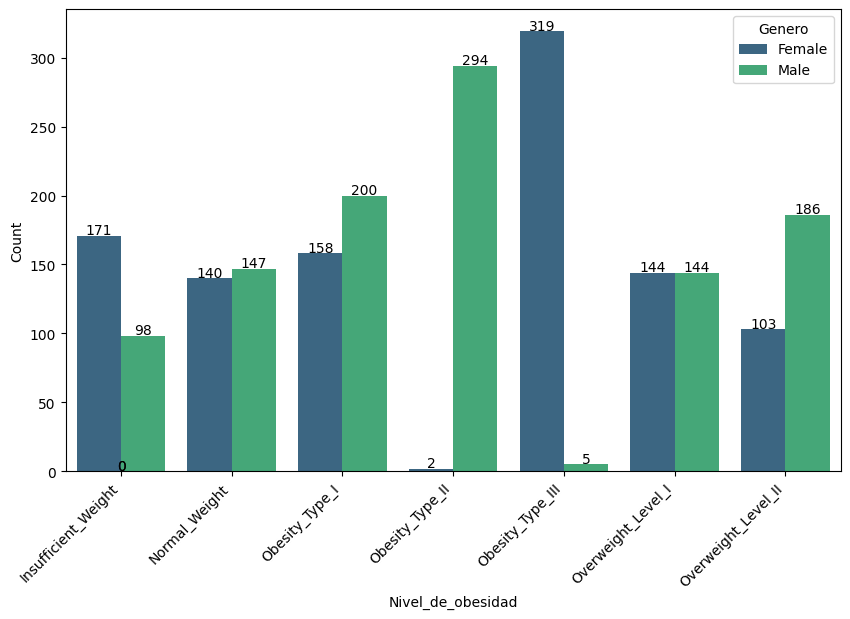

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='Nivel_de_obesidad', y='Count', hue='Genero', palette='viridis')
plt.xticks(rotation=45, ha='right')

for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height() + 1,
                   int(p.get_height()), ha='center', fontsize=10,)

se realiza la comparacion entre hombres y mujeres, se evidencia que la mayor diferencia de datos entre los hombres y mujeres está en la obesidad tipo 2 y 3, donde casi la totalidad de los datos de la obesidad tipo 2 son hombres y en la obesidad tipo 3 son mujeres